In [ ]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
# Setup working directory and load data
DIR = '/content/drive/My Drive/Colab Notebooks/OddSem2020MAHE'
FILENAME = 'Data/president_heights.csv'
#FILENAME = 'Data/glass.csv'
os.chdir(DIR)
df = pd.read_csv(FILENAME) # read the csv file on to a dataframe 

In [ ]:
def plotVectors(X, vectornames = None):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('Vectors in standard positions')
  origin = np.array([np.zeros(len(X)), np.zeros(len(X))]) # origin point
  colors = cm.rainbow(np.linspace(0, 1, len(X))) # colors for vectors  
  plt.axvline(0)
  plt.axhline(0)
  ax.quiver(*origin, X[:,0], X[:,1], color = colors,
            angles = 'xy', scale_units ='xy', scale = 1)
  axlim = np.max(abs(X))
  ax.axis('equal')
  ax.set_xlim([-axlim-5, axlim+5])
  ax.set_ylim([-axlim-5, axlim+5])
  # Change step = step = np.ceil(axlim/2) for different grid position
  ax.set_xticks(np.arange(-axlim-5, axlim+5+1, step = 1))
  ax.set_yticks(np.arange(-axlim-5, axlim+5+1, step = 1))
  for k in range(0, len(X)):
    if k+1 > len(vectornames):
      name = ''
    else:
      name = vectornames[k]  
    ax.text(X[k, 0]*1.1, X[k, 1]*1.1, name,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontsize = 11)

4.0


-1.0000000000000002

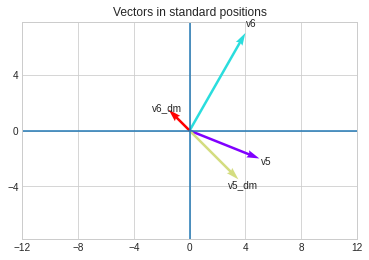

In [ ]:
v1 = np.array([2, 3])
v2 = np.array([-3, -2])
v3 = np.array([-1, -4])
v4 = np.array([-1, -3])
v5 = np.array([5, -2])
v6 = np.array([4, 7])
#plotVectors(np.array([v1, v2, v3, v4, (2)*v1+(1)*v2+(1)*v3+0*v4]),
#            ['v1', 'v2', 'v3', 'v4', '(2)*v1+(1)*v2+(1)*v3+0*v4']) # c1*v1 + c2*v2 + c3*v3 = zero vector
plotVectors(np.array([v5, v6, v5-np.mean(v5), v6-np.mean(v6)]),
            ['v5', 'v6', 'v5_dm', 'v6_dm'])
np.dot(v5-np.mean(v5), v6-np.mean(v6))/(np.linalg.norm(v5-np.mean(v5))*np.linalg.norm(v6-np.mean(v6)))

In [ ]:
# Create a new column with heights in inches
df['height(in)'] = df['height(cm)'] * (1/2.54)
# Create a new column with randomly generated values of weight in pounds
#df['weight(lbs)'] = np.round(np.random.normal(170, 15, len(df)))
#df['weight(lbs)'] = df['height(cm)']+np.round(np.random.normal(2, 1, len(df)))
df['weight(lbs)'] = df['height(cm)']-np.round(np.random.normal(2, 1, len(df)))

Index(['order', 'name', 'height(cm)', 'height(in)', 'weight(lbs)'], dtype='object')


In [ ]:
# Scatter plot between RI and Si of glass data
#plt.plot(df['RI'], df['Si'], 'o', color = 'black')
#plt.xlabel('RI')
#plt.ylabel('Si')
#np.corrcoef(df['RI'], df['Si'])

array([[1.        , 0.99318328],
       [0.99318328, 1.        ]])

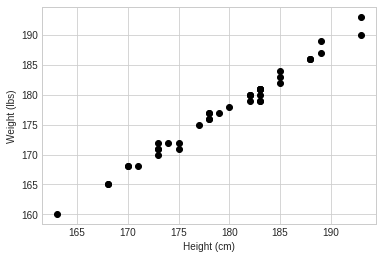

In [ ]:
# Scatter plot between heights (in) and weight (lbs)
plt.plot(df['height(cm)'], df['weight(lbs)'], 'o', color = 'black')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (lbs)')
np.corrcoef(df['height(cm)'], df['weight(lbs)'])

In [ ]:
# Create vectors corresponding to height values in cm, in, and weight in pounds
a = np.array(df['height(cm)'])
b = np.array(df['height(in)'])
c = np.array(df['weight(lbs)'])

In [ ]:
print('Standard deviation of height(cm) = %f cm\n'%(np.std(a)))
alpha = 3.5
print('Standard deviation of height+alpha*onesvector(cm) = %f cm\n'%(np.std(a+alpha)))
beta = 10
print('Standard deviation of height(cm) = %f cm\n'%(np.std(beta*a)))
gamma = -10
print('Standard deviation of height(cm) = %f cm\n'%(np.std(gamma*a)))

In [ ]:
print('Absolute value of dot-product = %f, product of the norms = %f\n'%(np.abs(np.dot(a, c)), np.linalg.norm(a)*np.linalg.norm(c)))

Absolute value of dot-product = 1292413.000000, product of the norms = 1295512.902521



In [ ]:
# Angle and dot-product between vectors
print(np.dot(v1, v2))
print(np.dot(v1, v3))
print(np.dot(v1, v4))

0
17
-11


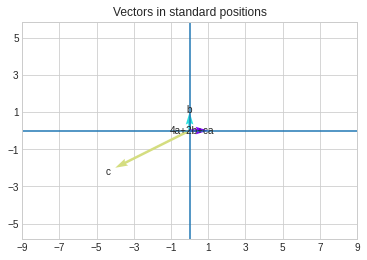

In [ ]:
a = np.array([1, 0])
b = np.array([0, 1])
c = np.array([-4, -2])
plotVectors(np.array([a, b, c, (4)*a+(2)*b+(1)*c]), ['a', 'b', 'c', '4a+2b+c'])

In [ ]:
# A system with no solutions
A = sp.Matrix([[1, 2, 3], [1, -5, 2]]) # an augmented matrix corresponding to
# x1+2*x2 = 3 and x1-5*x2 = 2
print(A.rref())
# x1, x2 are the pivot variables

A = sp.Matrix([[1, 2, 30], [1, -5, 20]]) # an augmented matrix corresponding to
# x1+2*x2 = 30 and x1-5*x2 = 20
print(A.rref())
# x1, x2 are the pivot variables

A = sp.Matrix([[1, 2, -10], [1, -5, -9]]) # an augmented matrix corresponding to
# x1+2*x2 = -10 and x1-5*x2 = -9
print(A.rref())
# x1, x2 are the pivot variables

# Define symbols for RHS
b1, b2 = sp.symbols('b1 b2')

A = sp.Matrix([[1, 2, b1], [1, -5, b2]]) # an augmented matrix corresponding to
# x1+2*x2 = b1 and x1-5*x2 = b2
print(A.rref())
# x1, x2 are the pivot variables

A = sp.Matrix([[1, 4, 7, 10, 13], [2, 5, 8, 11, 14], [3, 6, 9, 12, 15]]) # an augmented matrix 
# x1, x2 are the pivot variables, x3, x4 are the free variables


#A = sp.Matrix([[1, 5, 9, 13, 17], [2, 6, 10, 14, 18],
#               [3, 7, 11, 15, 19], [4, 8, 12, 16, 20]]) # an augmented matrix 
print(A.rref())               
# x1, x2 are the pivot variables, x3, x4 are the free variables

(Matrix([
[1, 0, 19/7],
[0, 1,  1/7]]), (0, 1))
(Matrix([
[1, 0, 190/7],
[0, 1,  10/7]]), (0, 1))
(Matrix([
[1, 0, -68/7],
[0, 1,  -1/7]]), (0, 1))
(Matrix([
[1, 0, 5*b1/7 + 2*b2/7],
[0, 1,     b1/7 - b2/7]]), (0, 1))
(Matrix([
[1, 0, -1, -2, -3],
[0, 1,  2,  3,  4],
[0, 0,  0,  0,  0]]), (0, 1))


In [ ]:
a = np.array([1, 0])
b = np.array([2, 0])
c = np.array([4, 3])
plotVectors(np.array([a, b, c]), ['a', 'b', 'c'])

{(2/3, 5/3)}

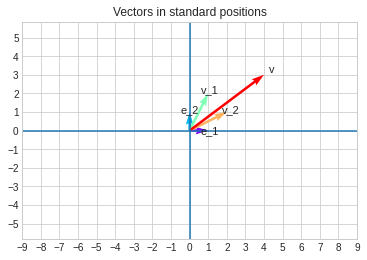

In [ ]:
# Standard basis vectors in R^2
e1 = np.array([1, 0]) 
e2 = np.array([0, 1])

# Basis vectors in R^2
v1 = np.array([1, 2]) 
v2 = np.array([2, 1]) 

# A vector in R^2
v = np.array([4, 3]) 

plotVectors(np.array([e1, e2, v1, v2, v]),
            ['e_1', 'e_2', 'v_1', 'v_2', 'v'])

# Coordinates of vector in standard basis
# See https://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve
x1, x2 = sp.symbols('x1, x2')
sp.linsolve(sp.Matrix(([1, 2, 4], [2, 1, 3])), (x1, x2))

In [ ]:
v1 = np.array([0, 0, -1])
v2 = (1/np.sqrt(2)) * np.array([1, 1, 0])
v3 = (1/np.sqrt(2)) * np.array([1, -1, 0])

# Norms of the vectors
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))
print(np.linalg.norm(v3))
print('\n')

# Dot product between the vectors
print(np.dot(v1, v2))
print(np.dot(v1, v3))
print(np.dot(v2, v3))
print('\n')

# Is the set {v1, v2, v3} a linearly independent set
A = sp.Matrix(([0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
               [0, 1/np.sqrt(2), -1/np.sqrt(2), 0],
               [-1, 0, 0, 0]))
x1, x2, x3 = sp.symbols('x1, x2, x3')
print(sp.linsolve(A, (x1, x2, x3)))
print('\n')

# Coordinates of np.array([1, 2, 3]) w.r.t. the orthonormal basis set {v1, v2, v3)}
A = sp.Matrix(([0, 1/np.sqrt(2), 1/np.sqrt(2), 1],
               [0, 1/np.sqrt(2), -1/np.sqrt(2), 2],
               [-1, 0, 0, 3]))
x1, x2, x3 = sp.symbols('x1, x2, x3')
print(sp.linsolve(A, (x1, x2, x3)))
print('\n')

# Coordinates of np.array([1, 2, 3]) w.r.t. the orthonormal basis set {v1, v2, v3)}
# using a dot product
v = np.array([1, 2, 3])
print(np.dot(v1, v))
print(np.dot(v2, v))
print(np.dot(v3, v))

1.0
0.9999999999999999
0.9999999999999999


0.0
0.0
0.0


{(0, 0, 0)}


{(-3, 2.12132034355964, -0.707106781186548)}


-3
2.1213203435596424
-0.7071067811865475


{(4.94974746830583, -0.707106781186548)}


4.949747468305832
-0.7071067811865475


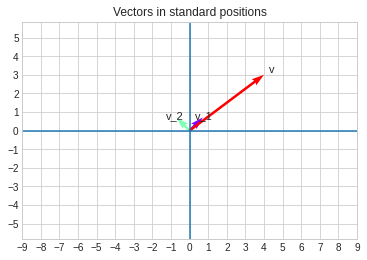

In [ ]:
# Standard basis vectors in R^2
e1 = np.array([1, 0]) 
e2 = np.array([0, 1])

# Non-standard basis vectors in R^2
v1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)]) 
v2 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)]) 

# A vector in R^2
v = np.array([4, 3]) 

plotVectors(np.array([v1, v2, v]),
            ['v_1', 'v_2', 'v'])

# Coordinates of np.array([4, 3]) w.r.t. the orthonormal basis set {v1, v2)}
A = sp.Matrix(([1/np.sqrt(2), -1/np.sqrt(2), 4],
               [1/np.sqrt(2), 1/np.sqrt(2), 3]))
x1, x2 = sp.symbols('x1, x2')
print(sp.linsolve(A, (x1, x2)))
print('\n')

# Coordinates of np.array([4, 3]) can be derived using dot products
np.array([4, 3])
print(np.dot(v1, v)) # dot product between v1 and v
print(np.dot(v2, v)) # dot product between v2 and v

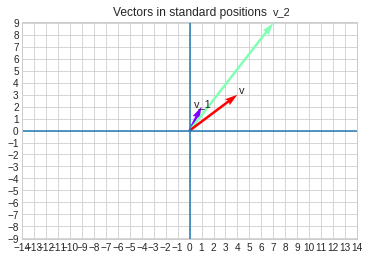

In [ ]:
# Nonorthogonal basis vectors in R^2
v1 = np.array([1, 2]) 
v2 = np.array([7, 9])

# Orthogonal basis vectors in R^2
w1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)]) 
w2 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)]) 

# A vector in R^2
v = np.array([4, 3]) 

plotVectors(np.array([v1, v2, v]),
            ['v_1', 'v_2', 'v'])

# Coordinates of np.array([4, 3]) w.r.t. the orthonormal basis set {v1, v2)}
#A = sp.Matrix(([1/np.sqrt(2), -1/np.sqrt(2), 4],
#               [1/np.sqrt(2), 1/np.sqrt(2), 3]))
#x1, x2 = sp.symbols('x1, x2')
#print(sp.linsolve(A, (x1, x2)))
#print('\n')

# Coordinates of np.array([4, 3]) can be derived using dot products
#np.array([4, 3])
#print(np.dot(v1, v)) # dot product between v1 and v
#print(np.dot(v2, v)) # dot product between v2 and v

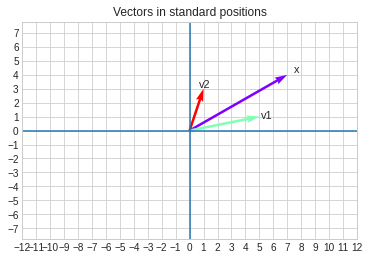

In [ ]:
# Projection of a vector on to the direction of another vector
x = np.array([7, 4]) # a vector which we want to project
v1 = np.array([5, 1]) # a vector on to which we want to project
v2 = np.array([1, 3])

v1_normalized = v1 / np.linalg.norm(v1) # direction of v1
scalar_projection = np.dot(v1_normalized, x) # shadow length
vector_projection = scalar_projection * v1_normalized # shadow length x direction

plotVectors(np.array([x, v1, v2]),
            ['x', 'v1', 'v2'])

In [ ]:
def plotveccomp(x, name = ' ', axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = 'black', marker = '') 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  #ax.set_xlabel('')
  #ax.set_ylabel('')
  #ax.set_title(' ')

In [ ]:
from scipy.misc import electrocardiogram

In [ ]:
ecg = electrocardiogram()
ecg = ecg[0:256]

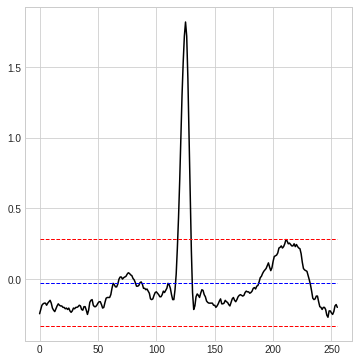

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(ecg, '', ax)

In [ ]:
N = len(ecg)
print(N)

256


In [ ]:
# Direction onto which we will project the ECG vector
ns = np.arange(N)
one_cycle = 2 * np.pi * ns / N
k = 1
t_k = k * one_cycle
q = np.cos(t_k)

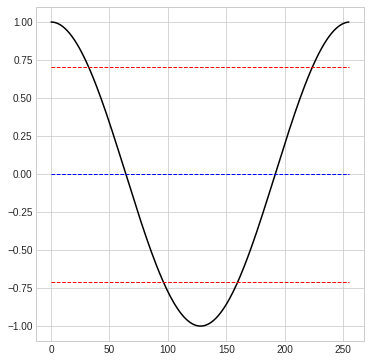

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(np.cos(t_k), '', ax)